In [55]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import tensorflow as tf
# import torch

In [56]:
data = pd.read_csv('feature_importance.csv')
# data = data.set_index('Unnamed: 0')
x = data
n_clusters = 2

In [57]:
x

,original_glcm_InverseVariance_para1,original_firstorder_10Percentile_para1,original_shape_MeshVolume_para2,original_gldm_LargeDependenceHighGrayLevelEmphasis_para2,original_firstorder_Skewness_para2,original_gldm_LargeDependenceHighGrayLevelEmphasis_para1,original_firstorder_RootMeanSquared_para1,original_shape_Flatness_para2,original_ngtdm_Contrast_para1,original_firstorder_90Percentile_para1,original_glszm_GrayLevelNonUniformityNormalized_para1,original_glcm_Id_para1,original_glszm_ZoneVariance_para1,original_firstorder_Kurtosis_para1,original_shape_Maximum2DDiameterRow_para1,original_glcm_Idmn_para2,original_glszm_SizeZoneNonUniformityNormalized_para1,original_shape_SurfaceVolumeRatio_para2,original_firstorder_90Percentile_para2,original_shape_SurfaceVolumeRatio_para1
0,2.825993,-0.967419,1.937796,-1.171537,-0.299858,-1.166825,1.823600,0.520856,-1.043698,-2.529901,1.046928,2.191392,-0.049723,-0.257978,1.334224,-1.779153,-2.484012,-0.112961,-2.479827,-0.113235
1,-0.480494,1.967777,0.973277,1.556973,-1.313059,1.551073,-1.174176,-1.094044,-0.603899,1.255785,-0.210060,-0.421320,-0.049917,-0.044878,-0.073177,0.567601,0.069448,-0.666765,1.254434,-0.665516
2,-0.727110,1.083942,-0.437778,-0.208222,0.292702,-0.207256,-1.053529,-0.276088,-0.276520,0.503132,-0.219557,-0.642969,-0.049937,-0.046687,-0.628579,0.564015,0.794866,-0.381890,0.512006,-0.381425
3,0.089323,-0.683356,-1.045375,-1.118121,1.362701,-1.113617,1.239916,1.204989,-0.654298,-1.901157,-0.077074,-0.015738,-0.049923,0.649007,-0.874337,0.064922,0.461965,-0.054545,-1.859624,-0.054979
4,0.313994,2.503886,-0.634991,-1.097832,0.406250,-1.093406,-2.037445,-0.228397,-0.898295,0.523257,-0.099955,0.307960,-0.049880,-0.034014,-1.080601,0.233947,-0.728153,-0.631441,0.531857,-0.630290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.057641,-0.133472,-0.312119,1.119496,-0.387825,1.115297,-0.182644,0.753925,0.804481,0.422635,-0.179730,0.017902,-0.049887,-0.409070,-1.037536,0.209622,-0.400954,-0.725045,0.432601,-0.723637
403,-0.198346,-0.282391,-0.170754,1.619439,-0.125009,1.613296,-0.192977,0.759172,-0.372793,0.945869,-0.225820,-0.198336,-0.049929,-0.120064,2.883935,0.808581,0.467990,4.775556,0.948728,4.761850
404,0.556593,2.700459,-0.741274,2.131727,-2.725526,2.123591,-1.777009,-0.167711,-0.755591,0.526132,0.138331,0.506873,-0.049892,1.057172,-0.153116,0.708626,-0.519547,0.181904,0.534692,0.180821
405,-0.052525,-0.602567,-0.366044,-0.212453,0.168166,-0.211471,0.657552,0.583963,0.905907,0.950756,-0.152742,-0.095776,-0.049900,-0.328575,-0.874337,0.330914,-0.229138,-0.638666,0.953549,-0.637495


In [58]:
silhouette_score_list = []
harabasz_score_list = []
bouldin_score_list = []
# nmf_silhouette_score_list = []
# nmf_harabasz_score_list = []
# nmf_bouldin_score_list = []
# ae_silhouette_score_list = []
# ae_harabasz_score_list = []
# ae_bouldin_score_list = []
# dae_silhouette_score_list = []
# dae_harabasz_score_list = []
# dae_bouldin_score_list = []
# vae_silhouette_score_list = []
# vae_harabasz_score_list = []
# vae_bouldin_score_list = []

In [59]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.mixture import GaussianMixture

In [60]:
cluster_assignments = pd.read_csv('./共识聚类/cluster_2.txt',sep='\t')
cluster_assignments = cluster_assignments['Cluster'].values

In [61]:
silhouette_score_list.append(silhouette_score(x,cluster_assignments))
harabasz_score_list.append(calinski_harabasz_score(x,cluster_assignments))
bouldin_score_list.append(davies_bouldin_score(x,cluster_assignments))

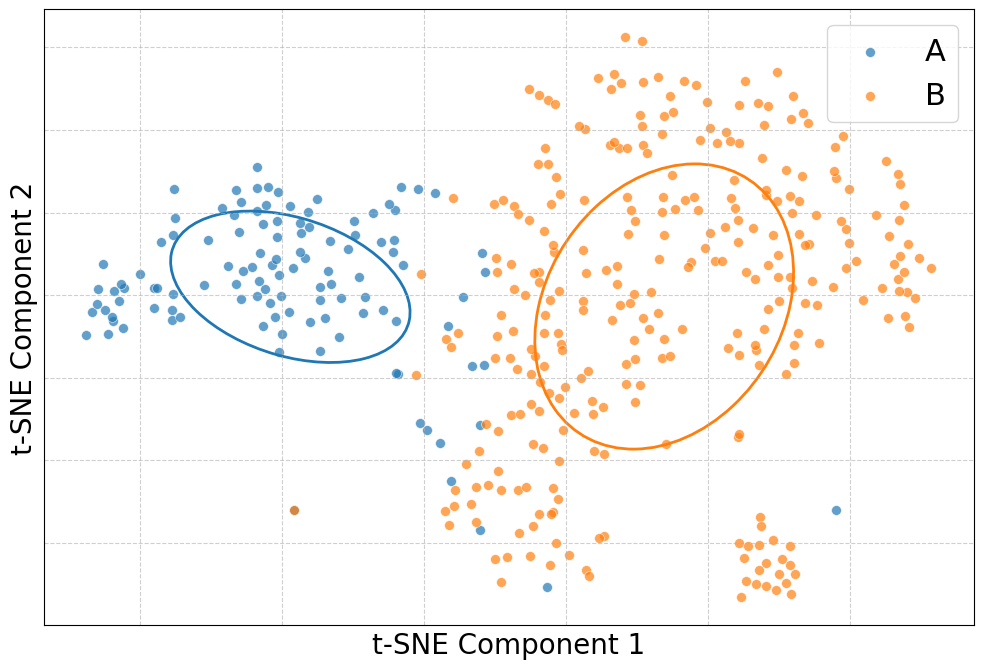

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


np.random.seed(123)
label = pd.DataFrame(cluster_assignments)


tsne = TSNE(n_components=2, random_state=123)
a = tsne.fit_transform(x)


liris = pd.DataFrame(a, index=x.index)


d1 = liris[label[0] == 'C1']
d2 = liris[label[0] == 'C2']


plt.figure(figsize=(12, 8))
type1 = plt.scatter(d1[0], d1[1], s=50, c='#1f77b4', label='A', alpha=0.7, edgecolors='w', linewidth=0.5)
type2 = plt.scatter(d2[0], d2[1], s=50, c='#ff7f0e', label='B', alpha=0.7, edgecolors='w', linewidth=0.5)


def plot_ellipse(data, ax, **kwargs):
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)

    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

ax = plt.gca()
plot_ellipse(d1, ax, edgecolor='#1f77b4', fc='None', lw=2)
plot_ellipse(d2, ax, edgecolor='#ff7f0e', fc='None', lw=2)

plt.legend(fontsize=22)
plt.xlabel('t-SNE Component 1', fontsize=20)
plt.ylabel('t-SNE Component 2', fontsize=20)
# plt.title('t-SNE Plot of Cluster Assignments', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
# Hide x and y axis ticks
plt.tick_params(
    axis='both',       
    which='both',      
    bottom=False,     
    top=False,         
    left=False,        
    right=False,       
    labelleft=False,   
    labelbottom=False  
)
plt.savefig('两类标签_CON.jpg', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()


In [63]:
cluster_assignments = pd.read_csv('./NMF/cluster_2.txt',sep='\t')
cluster_assignments = cluster_assignments['Cluster'].values

In [64]:
silhouette_score_list.append(silhouette_score(x,cluster_assignments))
harabasz_score_list.append(calinski_harabasz_score(x,cluster_assignments))
bouldin_score_list.append(davies_bouldin_score(x,cluster_assignments))

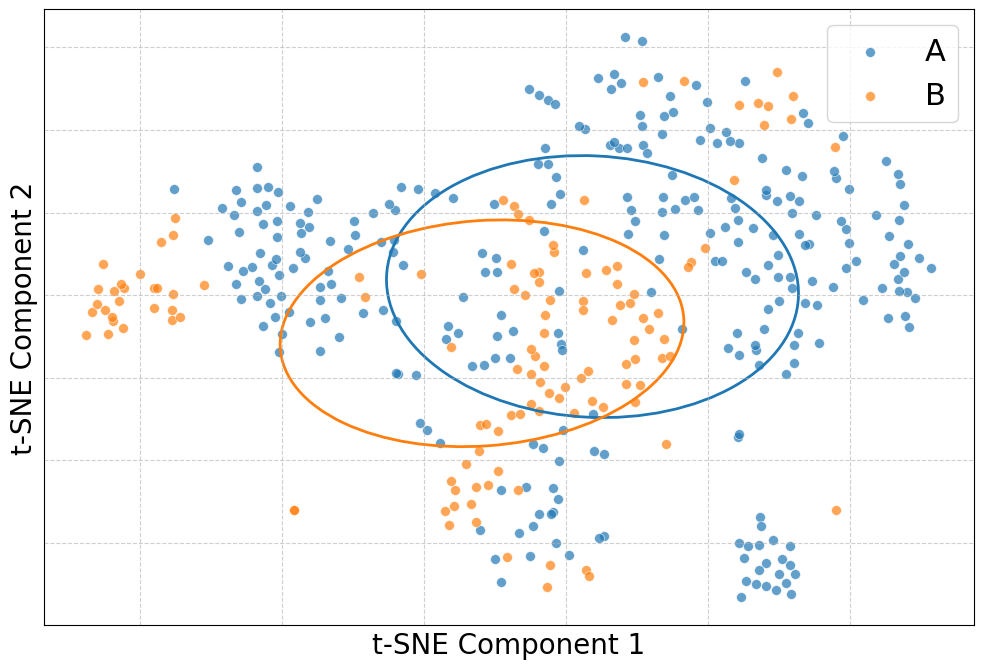

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

np.random.seed(123)
label = pd.DataFrame(cluster_assignments)

tsne = TSNE(n_components=2, random_state=123)
a = tsne.fit_transform(x)

liris = pd.DataFrame(a, index=x.index)

d1 = liris[label[0] == 'C1']
d2 = liris[label[0] == 'C2']

plt.figure(figsize=(12, 8))
type1 = plt.scatter(d1[0], d1[1], s=50, c='#1f77b4', label='A', alpha=0.7, edgecolors='w', linewidth=0.5)
type2 = plt.scatter(d2[0], d2[1], s=50, c='#ff7f0e', label='B', alpha=0.7, edgecolors='w', linewidth=0.5)

def plot_ellipse(data, ax, **kwargs):
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)

    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

ax = plt.gca()
plot_ellipse(d1, ax, edgecolor='#1f77b4', fc='None', lw=2)
plot_ellipse(d2, ax, edgecolor='#ff7f0e', fc='None', lw=2)

plt.legend(fontsize=22)
plt.xlabel('t-SNE Component 1', fontsize=20)
plt.ylabel('t-SNE Component 2', fontsize=20)
# plt.title('t-SNE Plot of Cluster Assignments', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
# Hide x and y axis ticks
plt.tick_params(
    axis='both',      
    which='both',      
    bottom=False,      
    top=False,         
    left=False,        
    right=False,       
    labelleft=False,   
    labelbottom=False  
)
plt.savefig('两类标签_NMF.jpg', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()


D:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


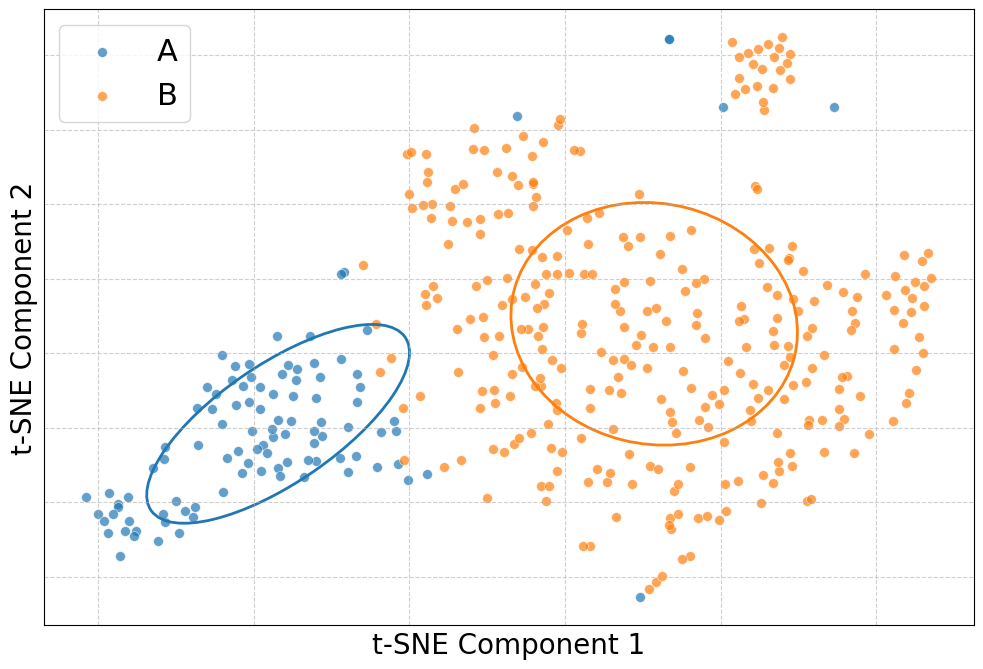

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

np.random.seed(123)
data = pd.read_csv('exp1.txt', sep='\t')
x = data

model = KMeans(n_clusters=2, random_state=123)
cluster_assignments = model.fit_predict(x)
label = pd.DataFrame(cluster_assignments, columns=['Cluster'])

tsne = TSNE(n_components=2, random_state=123)
a = tsne.fit_transform(x)

liris = pd.DataFrame(a, index=x.index)

d1 = liris[label['Cluster'] == 0]
d2 = liris[label['Cluster'] == 1]

plt.figure(figsize=(12, 8))
type1 = plt.scatter(d1[0], d1[1], s=50, c='#1f77b4', label='A', alpha=0.7, edgecolors='w', linewidth=0.5)
type2 = plt.scatter(d2[0], d2[1], s=50, c='#ff7f0e', label='B', alpha=0.7, edgecolors='w', linewidth=0.5)

def plot_ellipse(data, ax, **kwargs):
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

ax = plt.gca()
plot_ellipse(d1, ax, edgecolor='#1f77b4', fc='None', lw=2)
plot_ellipse(d2, ax, edgecolor='#ff7f0e', fc='None', lw=2)

plt.legend(fontsize=22)
plt.xlabel('t-SNE Component 1', fontsize=20)
plt.ylabel('t-SNE Component 2', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(
    axis='both',       
    which='both',      
    bottom=False,      
    top=False,         
    left=False,        
    right=False,       
    labelleft=False,   
    labelbottom=False  
)
plt.savefig('两类标签_Kmeans.jpg', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()


In [67]:
silhouette_score_list.append(silhouette_score(x,cluster_assignments))
harabasz_score_list.append(calinski_harabasz_score(x,cluster_assignments))
bouldin_score_list.append(davies_bouldin_score(x,cluster_assignments))

D:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


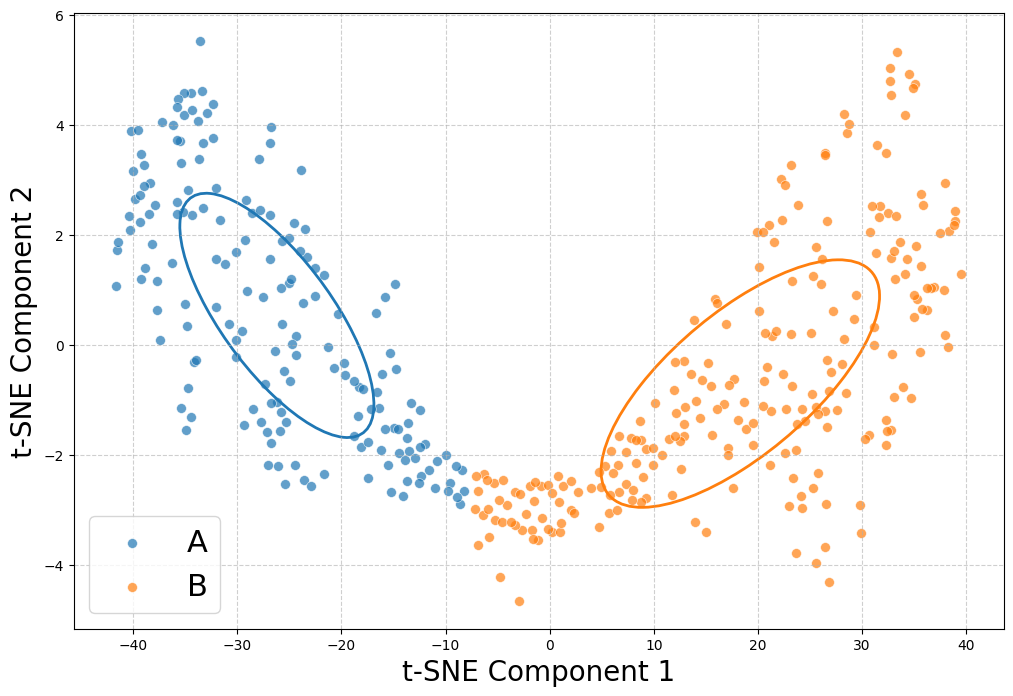

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse

np.random.seed(123)
H = pd.read_csv('U1_86.csv', header=None)
x = H

model = KMeans(n_clusters=2, random_state=123)
cluster_assignments = model.fit_predict(x)
label = pd.DataFrame(cluster_assignments, columns=['Cluster'])

tsne = TSNE(n_components=2, random_state=123)
a = tsne.fit_transform(x)

liris = pd.DataFrame(a, index=x.index)

d1 = liris[label['Cluster'] == 0]
d2 = liris[label['Cluster'] == 1]

plt.figure(figsize=(12, 8))
type1 = plt.scatter(d1[0], d1[1], s=50, c='#1f77b4', label='A', alpha=0.7, edgecolors='w', linewidth=0.5)
type2 = plt.scatter(d2[0], d2[1], s=50, c='#ff7f0e', label='B', alpha=0.7, edgecolors='w', linewidth=0.5)

def plot_ellipse(data, ax, **kwargs):
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(eigvals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

ax = plt.gca()
plot_ellipse(d1, ax, edgecolor='#1f77b4', fc='None', lw=2)
plot_ellipse(d2, ax, edgecolor='#ff7f0e', fc='None', lw=2)

plt.legend(fontsize=22)
plt.xlabel('t-SNE Component 1', fontsize=20)
plt.ylabel('t-SNE Component 2', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('两类标签_DNMF.jpg', bbox_inches='tight', pad_inches=0.1, dpi=600)
plt.show()


In [69]:
label.to_csv('label_subtype_JNMF.csv',index=False)

In [70]:
silhouette_score_list.append(silhouette_score(x,cluster_assignments))
harabasz_score_list.append(calinski_harabasz_score(x,cluster_assignments))
bouldin_score_list.append(davies_bouldin_score(x,cluster_assignments))

In [71]:
silhouette_score_list.append(silhouette_score(x,cluster_assignments))
harabasz_score_list.append(calinski_harabasz_score(x,cluster_assignments))
bouldin_score_list.append(davies_bouldin_score(x,cluster_assignments))

In [72]:
label.to_csv('label_subtype_final.csv',index=False)

In [79]:
print(f"bouldin_score_list:{bouldin_score_list}")
print(f"silhouette_score_list:{silhouette_score_list}")
print(f"harabasz_score_list:{harabasz_score_list}")

bouldin_score_list:[1.5706977960301993, 5.598255186266824, 1.5464143250206661, 0.6866769633005307, 0.6866769633005307]
silhouette_score_list:[0.2843598730054833, 0.06297321304556426, 0.32281982004983406, 0.5058559400510111, 0.5058559400510111]
harabasz_score_list:[98.33583785070402, 8.590491636030151, 102.89548669198132, 505.71820790546616, 505.71820790546616]


In [84]:
# Adjust image dimensions to make the charts less wide and more proportional

# Bouldin Score
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x, bouldin_score_list, width, color='skyblue', label='Bouldin Score')
ax.set_title('Bouldin Score by Cluster')
ax.set_ylabel('Bouldin Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("bouldin_score_chart.png")
plt.close()

# Silhouette Score
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x, silhouette_score_list, width, color='lightgreen', label='Silhouette Score')
ax.set_title('Silhouette Score by Cluster')
ax.set_ylabel('Silhouette Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("silhouette_score_chart.png")
plt.close()

# Harabasz Score
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x, harabasz_score_list, width, color='salmon', label='Harabasz Score')
ax.set_title('Harabasz Score by Cluster')
ax.set_ylabel('Harabasz Score')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("harabasz_score_chart.png")
plt.close()

"Updated charts saved with adjusted dimensions."


'Updated charts saved with adjusted dimensions.'